In [1]:
import numpy as np
import collections
import json

import matplotlib.pyplot as plt
#plt.switch_backend('agg')
import matplotlib
import sys
import os
sys.path.append('../')
from utils import utils
from utils import mpl_stylesheet
from utils import read_tejaas_results
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 22, colors = 'banskt', dpi = 300)

In [4]:
infile = '../transeqtls_per_tissue.txt'

nteqtls = dict()
with open(infile, 'r') as instream:
    for line in instream:
        linesplit = line.split()
        tissue = linesplit[1].strip()
        nteqtls[tissue] = int(linesplit[0].strip()) - 1

In [6]:
tissue_file = '../tissue_table.txt'
json_file = '../external/gtex_metadata.json'

In [7]:
tshorts, tfulls = utils.read_tissues(tissue_file)
with open(json_file) as instream:
    gtex_meta = json.load(instream)
tissue_colors = dict()
tissue_names = dict()
for tshort, tfull in zip(tshorts, tfulls):
    if tshort in tshorts:
        tissue_names[tshort] = tfull
        tissue_colors[tshort] = "#" + gtex_meta[tfull.replace(" ", "_")]["colorHex"]

In [8]:
nteqtls.keys()

dict_keys(['aa', 'ac', 'ag', 'as', 'at', 'av', 'bam', 'ban', 'bca', 'bceh', 'bce', 'bco', 'bfr', 'bhi', 'bhy', 'bl', 'bnu', 'bpu', 'br', 'bsp', 'bsu', 'cols', 'colt', 'ebv', 'esog', 'esom', 'esomu', 'fib', 'haa', 'hlv', 'kc', 'liv', 'lu', 'msg', 'ms', 'nt', 'ov', 'pan', 'pit', 'pro', 'si', 'snse', 'spl', 'sse', 'sto', 'tes', 'thy', 'ut', 'va', 'wb'])

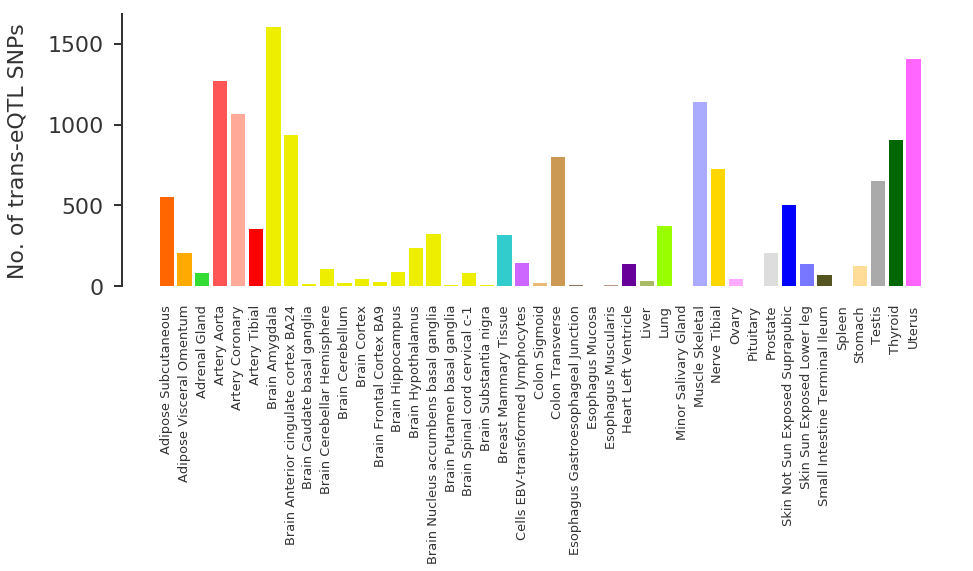

In [19]:
objects = list()
performance = list()
significance = list()
bar_colors = list()

tkeys = nteqtls.keys()

for tshort in tshorts:
    if tshort in tkeys:
        if nteqtls[tshort] > 1:
            objects.append(tissue_names[tshort])
            bar_colors.append(tissue_colors[tshort])
            performance.append(nteqtls[tshort])
    

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(111)

x_pos = np.arange(len(objects))
bar1 = ax1.bar(x_pos, performance, align='center', linewidth = 0, color = bar_colors)

ax1.set_xticks(x_pos)
ax1.set_xticklabels(objects)
ax1.set_ylabel('No. of trans-eQTL SNPs')

ax1.tick_params(bottom = False, top = False, left = True, right = False, labelleft = True, labelbottom = True)
for side, border in ax1.spines.items():
    if not side == 'left':
        border.set_visible(False)
        
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
    
for label in (ax1.get_xticklabels()):
    label.set_fontsize(13)

#fig.canvas.draw()
#xticklabels = [f'{x.get_position()[0] + 1 :3.1f}' for x in ax1.get_xticklabels()]
#ax1.set_xticklabels(xticklabels)

plt.savefig('../plots/trans_eqtls_per_tissue.png', bbox_inches='tight')
plt.show()